In [ ]:
import numpy as np;
import pandas as pd;
import csv
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import 	WordNetLemmatizer

pd.options.mode.chained_assignment = None

In [ ]:
file = "bbc-news-data.csv"
data = pd.read_csv(file,sep="\t") 
                                                                
data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
data = data.dropna().drop_duplicates()

data.replace(",","",regex=True,inplace=True)
data.replace(r'\s+', ' ', regex=True, inplace=True)
data['title'] = data['title'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data['content'] = data['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

data.head(10)

# Transforming  data

In [ ]:
data = data.drop(["category"],axis=1)
data.info()

In [ ]:
data['brand']= data["content"].str.split().str.get(3)

data.head()

In [ ]:
data['Model'] = data["title"].str.split().str.get(1) + data["title"].str.split().str.get(2)
data.head()


In [ ]:
data['Model'] = data["title"].str.split().str.get(1) + data["title"].str.split().str.get(2)
data.head()

In [ ]:
data.at[0, 'content'] = data.at[0, 'content'].replace('US', 'United States,')
data.head(1)

# Steming

In [ ]:
stemmer = PorterStemmer()

for words in data:
    print(words,"|",stemmer.stem(words))

In [ ]:
nltk.tokenize.WhitespaceTokenizer().tokenize(data["content"][10])

In [ ]:
nltk.tokenize.WordPunctTokenizer().tokenize(data["content"][10])

In [ ]:
nltk.tokenize.TreebankWordTokenizer().tokenize(data["content"][0])

In [ ]:
words  = nltk.tokenize.WhitespaceTokenizer().tokenize(data["content"][2])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)

porterStemmedWords = [nltk.stem.PorterStemmer().stem(word) for word in words]
df['PorterStemmedWords'] = pd.Series(porterStemmedWords)

snowballStemmedWords = [nltk.stem.SnowballStemmer("english").stem(word) for word in words]
df['SnowballStemmedWords'] = pd.Series(snowballStemmedWords)
df

In [4]:
words = nltk.tokenize.WhitespaceTokenizer().tokenize(data["content"][0])
df = pd.DataFrame()
df["Old"] = pd.Series(words)

wordNetLemmatizedWords = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in words]
df["New"] = pd.Series(wordNetLemmatizedWords)
df

,Old,New
0,Quarterly,Quarterly
1,profits,profit
2,at,at
3,US,US
4,media,medium
...,...,...
410,the,the
411,value,value
412,of,of
413,that,that


In [ ]:
def tokenize_and_lemmatize(text):
    data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
    words = nltk.tokenize.WhitespaceTokenizer().tokenize(text)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words).lower()

data['new content'] = data['content'].apply(tokenize_and_lemmatize)

data

In [ ]:
data1 = pd.get_dummies(data,columns=['filename'])

data1

# Lemitizacija

In [ ]:
soret = data.sort_values(by=["Model"])
display(soret)

In [ ]:
data.describe(include="all").T

In [ ]:
no_filename=data.filter(['title','content'])
display(no_filename)

In [ ]:
new = data.copy()
new['content'] = new['content'].replace(to_replace = ('US','UK'),value =('United States','United Kingdom'),regex=True)

new

In [ ]:
(data.isnull().sum()/(len(data)))*100

In [ ]:
copy = data.copy()
copy["filename"] = copy["filename"].replace(to_replace = ".txt",value = "", regex= True)

copy

In [ ]:
data2= data[(data["category"].str.endswith("sport"))]

data2

In [6]:
data1= data[(data["title"].str.startswith("Dollar"))]

data1

,category,filename,title,content,new content
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,the dollar ha hit it highest level against the...
179,business,180.txt,Dollar drops on reserves concerns,The US dollar has dropped against major curre...,the us dollar ha dropped against major currenc...
349,business,350.txt,Dollar hits new low versus euro,The US dollar has continued its recordbreakin...,the us dollar ha continued it recordbreaking s...
373,business,374.txt,Dollar hovers around record lows,The US dollar hovered close to record lows ag...,the us dollar hovered close to record low agai...
375,business,376.txt,Dollar slides ahead of New Year,The US dollar has hit a new record low agains...,the us dollar ha hit a new record low against ...


# Graficki prikazi

In [ ]:
data['category'].hist()

for i in range(len(data['category'].value_counts())):
    plt.text(i, data['category'].value_counts().iloc[i], str(data['category'].value_counts().iloc[i]), ha='center')

plt.show()

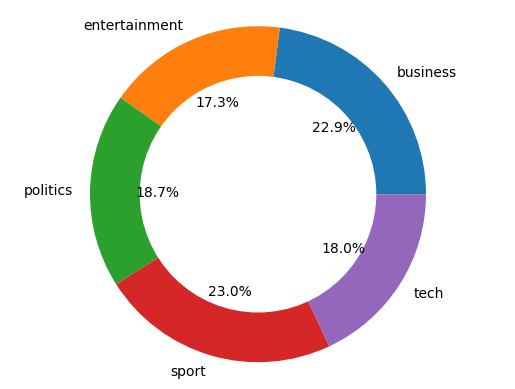

In [3]:
category_values = data.pivot_table(columns=['category'], aggfunc='size')
category_names = data['category']
categories = category_names.unique()
categories.sort()

total = category_values.sum()
category_percentages = category_values / total * 100

plt.pie(category_percentages, labels=categories, autopct='%1.1f%%')

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(my_circle)

plt.axis('equal')  
plt.show()

In [ ]:
import plotly.express as px

fig = px.line(x=[1,2,3], y=[1, 2,4]) 
 
fig.show()

In [ ]:
df = px.data.iris()

fig = px.bar(df,x = "sepal_width",y="sepal_length")
fig.show()

In [ ]:
df = px.data.iris()
fig = px.scatter(df,x = "species", y = "petal_width",size="petal_length",color="species")

fig.show()

In [ ]:
df = px.data.tips()
fig = px.pie(df,values = "total_bill",names="day")

fig.show()

In [ ]:
cat_cols= data.select_dtypes(include=["object"]).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3,2, figsize = (9,9))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'title', data = data, color = 'red', 
              order = data['title'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'category', data = data, color = 'green', 
              order = data['category'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'filename', data = data, color = 'yellow', 
              order = data['filename'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [ ]:
df = px.data.iris() 
 
fig = px.scatter_3d(df, x = 'sepal_width', 
                    y = 'sepal_length', 
                    z = 'petal_width', 
                    color = 'species') 
 
fig.show()

In [8]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2],
    y=[1, 1, 1],
    mode="lines+markers+text",
    name="Lines, Markers and Text",
    text=["Text A", "Text B", "Text C"],
    textposition="top center"
))

fig.add_trace(go.Scatter(
    x=[0, 1, 2],
    y=[2, 2, 2],
    mode="markers+text",
    name="Markers and Text",
    text=["Text D", "Text E", "Text F"],
    textposition="bottom center"
))

fig.add_trace(go.Scatter(
    x=[0, 1, 2],
    y=[3, 3, 3],
    mode="lines+text",
    name="Lines and Text",
    text=["Text G", "Text H", "Text I"],
    textposition="bottom center"
))

fig.show()

In [9]:
import plotly.express as px

df = px.data.gapminder(year=2007)
fig = px.bar(data, x='category', 
             title="Default behavior: some text is tiny")
fig.update_traces(textposition='inside')
fig.show()